Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

info Collection and Processing

In [ ]:
H_info = pd.read_csv('/content/H.csv')

In [ ]:
print(H_info)

     Patient_Age  Gender  Chest_Pain_Type  Resting_Blood_Pressure  \
0             63       1                3                     145   
1             37       1                2                     130   
2             41       0                1                     130   
3             56       1                1                     120   
4             57       0                0                     120   
..           ...     ...              ...                     ...   
298           57       0                0                     140   
299           45       1                3                     110   
300           68       1                0                     144   
301           57       1                0                     130   
302           57       0                1                     130   

     Serum_Cholestoral  Fasting_Blood_Sugar  Resting_Electrocardiographic  \
0                  233                    1                             0   
1                

In [ ]:
print(H_info.head())

   Patient_Age  Gender  Chest_Pain_Type  Resting_Blood_Pressure  \
0           63       1                3                     145   
1           37       1                2                     130   
2           41       0                1                     130   
3           56       1                1                     120   
4           57       0                0                     120   

   Serum_Cholestoral  Fasting_Blood_Sugar  Resting_Electrocardiographic  \
0                233                    1                             0   
1                250                    0                             1   
2                204                    0                             0   
3                236                    0                             1   
4                354                    0                             1   

   Maximum_Heart_Rate  Exercise_Induced_Angina  \
0                 150                        0   
1                 187                        0

In [ ]:
print(H_info.tail())

     Patient_Age  Gender  Chest_Pain_Type  Resting_Blood_Pressure  \
298           57       0                0                     140   
299           45       1                3                     110   
300           68       1                0                     144   
301           57       1                0                     130   
302           57       0                1                     130   

     Serum_Cholestoral  Fasting_Blood_Sugar  Resting_Electrocardiographic  \
298                241                    0                             1   
299                264                    0                             1   
300                193                    1                             1   
301                131                    0                             1   
302                236                    0                             0   

     Maximum_Heart_Rate  Exercise_Induced_Angina  \
298                 123                        1   
299               

In [ ]:
num_rows = H_info.shape[0]
num_cols = H_info.shape[1]
print(f"The infoset has {num_rows} rows and {num_cols} columns.")

The infoset has 303 rows and 14 columns.


In [ ]:
info_types = H_info.dtypes
print(info_types)

Patient_Age                         int64
Gender                              int64
Chest_Pain_Type                     int64
Resting_Blood_Pressure              int64
Serum_Cholestoral                   int64
Fasting_Blood_Sugar                 int64
Resting_Electrocardiographic        int64
Maximum_Heart_Rate                  int64
Exercise_Induced_Angina             int64
ST_depression_induced_exercise    float64
Slope_peak_exercise                 int64
Major_vessels_colored               int64
thal                                int64
target                              int64
dtype: object


In [ ]:
H_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient_Age                     303 non-null    int64  
 1   Gender                          303 non-null    int64  
 2   Chest_Pain_Type                 303 non-null    int64  
 3   Resting_Blood_Pressure          303 non-null    int64  
 4   Serum_Cholestoral               303 non-null    int64  
 5   Fasting_Blood_Sugar             303 non-null    int64  
 6   Resting_Electrocardiographic    303 non-null    int64  
 7   Maximum_Heart_Rate              303 non-null    int64  
 8   Exercise_Induced_Angina         303 non-null    int64  
 9   ST_depression_induced_exercise  303 non-null    float64
 10  Slope_peak_exercise             303 non-null    int64  
 11  Major_vessels_colored           303 non-null    int64  
 12  thal                            303 

In [ ]:
summary_stats_all = H_info.describe(include='all')
print(summary_stats_all)

       Patient_Age      Gender  Chest_Pain_Type  Resting_Blood_Pressure  \
count   303.000000  303.000000       303.000000              303.000000   
mean     54.366337    0.683168         0.966997              131.623762   
std       9.082101    0.466011         1.032052               17.538143   
min      29.000000    0.000000         0.000000               94.000000   
25%      47.500000    0.000000         0.000000              120.000000   
50%      55.000000    1.000000         1.000000              130.000000   
75%      61.000000    1.000000         2.000000              140.000000   
max      77.000000    1.000000         3.000000              200.000000   

       Serum_Cholestoral  Fasting_Blood_Sugar  Resting_Electrocardiographic  \
count         303.000000           303.000000                    303.000000   
mean          246.264026             0.148515                      0.528053   
std            51.830751             0.356198                      0.525860   
min     

In [ ]:
target_counts_grouped = H_info['target'].groupby(H_info['target']).count()
print(target_counts_grouped)

target
0    138
1    165
Name: target, dtype: int64


Dividing the predictor variables and response variable.

In [ ]:
X = H_info.loc[:, H_info.columns != 'target']
Y = H_info['target']

In [ ]:
print(f" {X}")

      Patient_Age  Gender  Chest_Pain_Type  Resting_Blood_Pressure  \
0             63       1                3                     145   
1             37       1                2                     130   
2             41       0                1                     130   
3             56       1                1                     120   
4             57       0                0                     120   
..           ...     ...              ...                     ...   
298           57       0                0                     140   
299           45       1                3                     110   
300           68       1                0                     144   
301           57       1                0                     130   
302           57       0                1                     130   

     Serum_Cholestoral  Fasting_Blood_Sugar  Resting_Electrocardiographic  \
0                  233                    1                             0   
1               

In [ ]:
print(f" {Y}")

 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Creating separate Learning and Analysis datasets from the original data.

In [ ]:
indices = np.arange(len(X))
train_indices, test_indices = train_test_split(indices, test_size=0.2, stratify=Y, random_state=2)
X_Learning, X_Analysis = X.iloc[train_indices], X.iloc[test_indices]
Y_Learning, Y_Analysis = Y.iloc[train_indices], Y.iloc[test_indices]

In [ ]:
print(np.shape(X), np.shape(X_Learning), np.shape(X_Analysis))

(303, 13) (242, 13) (61, 13)


Logistic Regression

Accuracy Score

In [ ]:
clf = LogisticRegression()
clf.fit(X_Learning, Y_Learning)

LogisticRegression()

In [ ]:
pred_logistic_test = clf.predict(X_Analysis)
pred_logistic_train = clf.predict(X_Learning)

In [ ]:
print("Training Accuracy: ", accuracy_score(Y_Learning, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(Y_Analysis, pred_logistic_test))

Training Accuracy:  0.8512396694214877
Test Accuracy:  0.819672131147541


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_Analysis)
cm = confusion_matrix(Y_Analysis, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(Y_Analysis, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[23  5]
 [ 6 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_Learning, Y_Learning)

DecisionTreeClassifier()

In [ ]:

pred_dt_test = dt.predict(X_Learning)
pred_dt_train = dt.predict(X_Learning)

In [ ]:
print("Training Accuracy: ", accuracy_score(Y_Learning, pred_dt_train))
print("Test Accuracy: ", accuracy_score(Y_Learning, pred_dt_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_Learning, pred_dt_test))

print("\nClassification Report:")
print(classification_report(Y_Learning, pred_dt_test))

Confusion Matrix: 
[[110   0]
 [  0 132]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# define the number of folds for cross-validation
num_folds = 10

# define the cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True)

# define the parameter grid for the decision tree model
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# create a decision tree model
P = DecisionTreeClassifier()

# create a GridSearchCV object
dt_grid_search = GridSearchCV(estimator=P, param_grid=dt_param_grid, cv=kfold, scoring='accuracy')

# fit the GridSearchCV object to the data
dt_grid_search.fit(X_Learning, Y_Learning)

# print the best parameters and score
print("Best parameters: ", dt_grid_search.best_params_)
print("Best score: ", dt_grid_search.best_score_)

# use the best parameters to fit a new decision tree model
best_P = DecisionTreeClassifier(**dt_grid_search.best_params_)
best_P.fit(X_Learning, Y_Learning)

# make predictions on the training and test sets using the new model
pred_dt_train = best_P.predict(X_Learning)
pred_dt_test = best_P.predict(X_Analysis)

# print the accuracy scores for the new model
print("Training Accuracy: ", accuracy_score(Y_Learning, pred_dt_train))
print("Test Accuracy: ", accuracy_score(Y_Analysis, pred_dt_test))

Best parameters:  {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.8133333333333332
Training Accuracy:  0.8181818181818182
Test Accuracy:  0.6885245901639344


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_Learning, Y_Learning)

RandomForestClassifier()

In [ ]:
train_pred_rf = rf.predict(X_Learning)
pred_rf = rf.predict(X_Analysis)

In [ ]:
print("Training Accuracy: ",accuracy_score(Y_Learning, train_pred_rf))
print("Test Accuracy: ",accuracy_score(Y_Analysis, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.7704918032786885


In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_Analysis, pred_rf))

print("\nClassification Report:")
print(classification_report(Y_Analysis, pred_rf))

Confusion Matrix: 
[[22  6]
 [ 8 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
import xgboost as xgb

# create an instance of XGBClassifier with default parameters
xg = xgb.XGBClassifier()

# fit the model to the training data
xg.fit(X_Learning, Y_Learning)

# predict target variable for test and train data using XGBoost classifier
xg_pred_train = xg.predict(X_Learning)
xg_pred = xg.predict(X_Analysis)

In [ ]:
xg_pred_train = xg.predict(X_Learning)
xg_pred = xg.predict(X_Analysis)

In [ ]:
print("Training Accuracy: ",accuracy_score(Y_Learning, xg_pred_train))
print("Test Accuracy: ",accuracy_score(Y_Analysis, xg_pred))

Training Accuracy:  1.0
Test Accuracy:  0.7704918032786885


In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_Analysis, xg_pred))

print("\nClassification Report:")
print(classification_report(Y_Analysis, xg_pred))

Confusion Matrix: 
[[21  7]
 [ 7 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import accuracy_score

# define the accuracy scores
scores = [
    ["Decision Tree", accuracy_score(Y_Learning, pred_dt_train), accuracy_score(Y_Analysis, pred_dt_test)],
    ["Random Forest", accuracy_score(Y_Learning, train_pred_rf), accuracy_score(Y_Analysis, pred_rf)],
    ["XGBoost", accuracy_score(Y_Learning, xg_pred_train), accuracy_score(Y_Analysis, xg_pred)],
    ["Logistic Regression", accuracy_score(Y_Learning, pred_logistic_train), accuracy_score(Y_Analysis, pred_logistic_test)]
]

# print the accuracy scores in a table format
headers = ["Model", "Training Accuracy", "Test Accuracy"]
print(tabulate(scores, headers=headers, tablefmt="grid", numalign="center", stralign="center"))

+---------------------+---------------------+-----------------+
|        Model        |  Training Accuracy  |  Test Accuracy  |
+=====================+=====================+=================+
|    Decision Tree    |      0.818182       |    0.688525     |
+---------------------+---------------------+-----------------+
|    Random Forest    |          1          |    0.770492     |
+---------------------+---------------------+-----------------+
|       XGBoost       |          1          |    0.770492     |
+---------------------+---------------------+-----------------+
| Logistic Regression |       0.85124       |    0.819672     |
+---------------------+---------------------+-----------------+


Building a Predictive System

Saving the trained model

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create and train a logistic regression model
clf = LogisticRegression()
clf.fit(X_Learning, Y_Learning)

# save the model to a file using pickle
filename = 'logistic_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# load the model from the file using pickle
loaded_clf = pickle.load(open(filename, 'rb'))

# make predictions using the loaded model
pred_logistic_test = loaded_clf.predict(X_Analysis)
pred_logistic_train = loaded_clf.predict(X_Learning)

# compute and print the accuracies
train_accuracy = accuracy_score(Y_Learning, pred_logistic_train)
test_accuracy = accuracy_score(Y_Analysis, pred_logistic_test)
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.8512396694214877
Test Accuracy:  0.819672131147541


# **Heart disease prediction**

In [ ]:
# importing the required dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import missingno as msno



**Data Analysis :**
* Dataset : PIMA Heart Dataset*

In [ ]:
#Loading the data from csv file to Dataframe using Pandas
Heart_data_df = pd.read_csv('/content/H.csv') 

**Chest_Pain_Type:** Heart attack chest pain is classified into four categories based on the type of discomfort experienced by the patient.

**Resting_Blood_Pressure:** A patient's resting blood pressure at the time of admission to the hospital is represented by this number in mm Hg.

**Serum_Cholestoral:** It represents the patient's serum cholesterol level in milligrams per deciliter.

**Fasting_Blood_Sugar:** This refers to the patient's fasting blood sugar levels in milligrams per deciliter.

**Resting_Electrocardiographic:** Here are the results of an electrocardiogram (ECG) performed on the patient at rest, categorized into three categories.

**Maximum_Heart_Rate:**  The maximum heart rate attained by a patient during a stress test is represented by this figure.

**Exercise_Induced_Angina:** As an indication of possible heart disease, chest pain or discomfort may occur during a stress test.

**Patient Age:** This denotes the age of the patient in years.

**ST_depression_induced_exercise:**  An indicator of heart disease is the reduced ST depression (measured in millimeters) caused by exercise compared to rest.

**Slope_peak_exercise:** There are three levels of slope for the peak exercise segment of the ST segment.

**Major_vessels_colored:** During a coronary angiography test, a dye is used to identify the number of major blood vessels.

**thal:** There are three levels of blood flow to the heart indicated by the results of a thallium stress test.

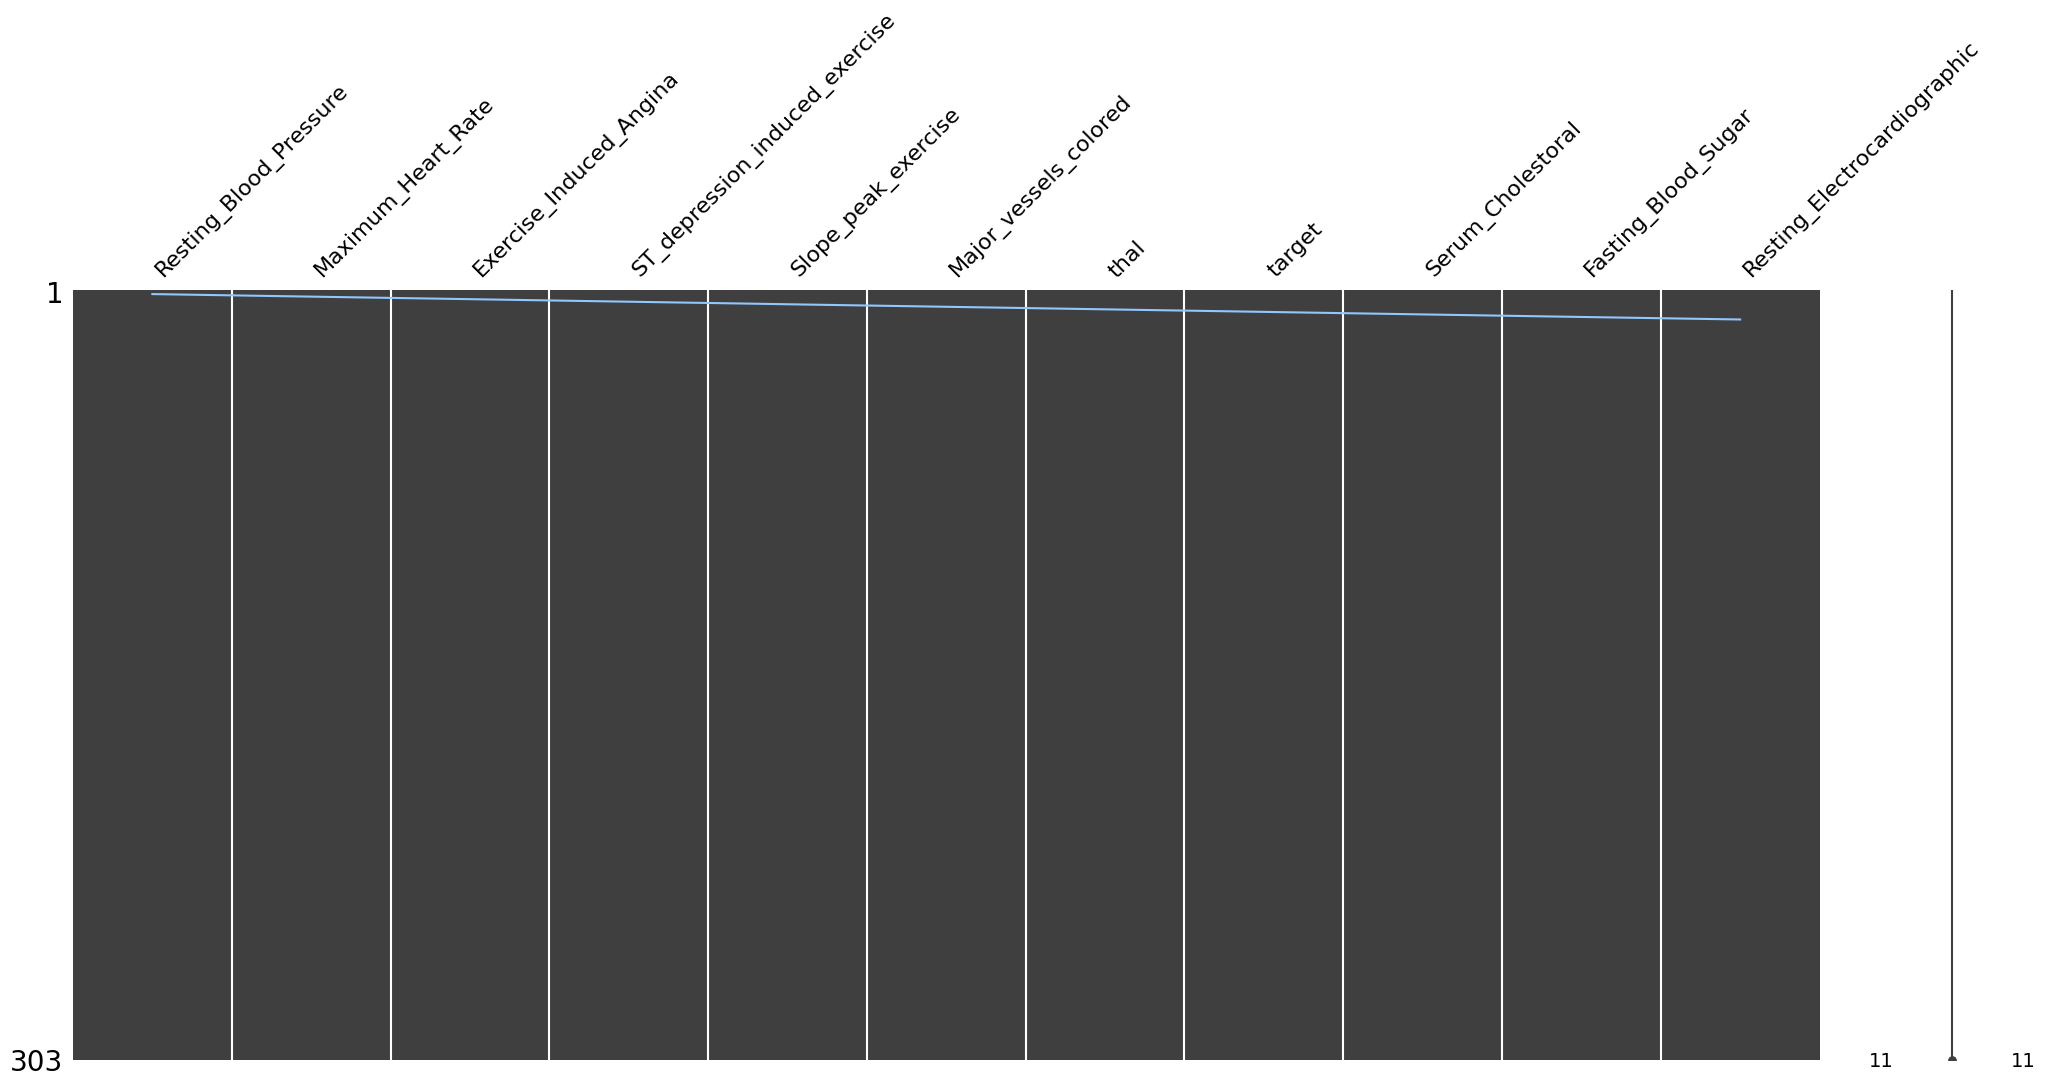

In [ ]:
msno.matrix(Heart_data_df[['Resting_Blood_Pressure','Maximum_Heart_Rate','Exercise_Induced_Angina','ST_depression_induced_exercise','Slope_peak_exercise','Major_vessels_colored','thal','target','Serum_Cholestoral','Fasting_Blood_Sugar','Resting_Electrocardiographic']])
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.show()

In [ ]:
Heart_data_df.columns

Index(['Patient_Age', 'Gender', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Serum_Cholestoral', 'Fasting_Blood_Sugar',
       'Resting_Electrocardiographic', 'Maximum_Heart_Rate',
       'Exercise_Induced_Angina', 'ST_depression_induced_exercise',
       'Slope_peak_exercise', 'Major_vessels_colored', 'thal', 'target'],
      dtype='object')

We could see that there are no missing values in the Dataset.

**Exploratory Data Analysis:**

In [ ]:
# Inorder to understand the outcomes
import matplotlib as plot 
import seaborn as sns
from itertools import cycle


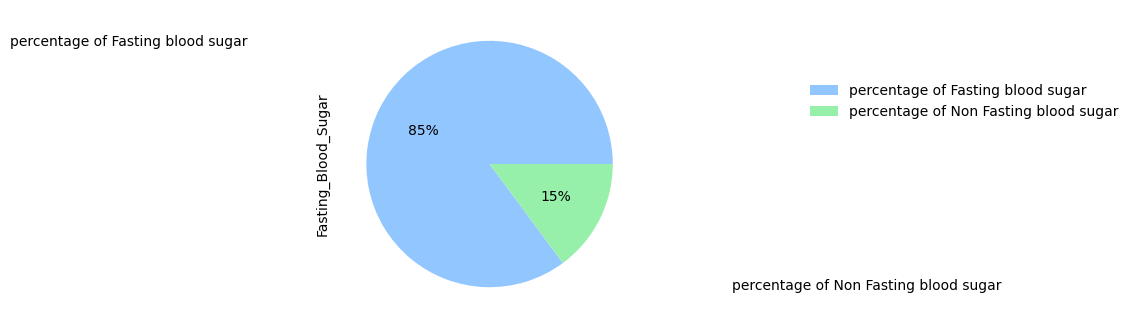

In [ ]:
import matplotlib.style as style
fig, ax = plt.subplots()
style.available
style.use('seaborn-pastel')
labels = ["percentage of Fasting blood sugar", "percentage of Non Fasting blood sugar"]
Heart_data_df['Fasting_Blood_Sugar'].value_counts().plot(kind='pie', labels=labels, autopct='%1.0f%%', labeldistance=2.2, figsize=(4,4))
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

Fasting blood sugar is much more common than non-fasting blood sugar, with 85% of the observations having fasting blood sugar levels.
Non-fasting blood sugar is relatively rare, with only 15% of the observations having non-fasting blood sugar levels.

It's important to note that this information does not provide any insight into the actual levels of blood sugar in the population, only the percentage of observations with fasting and non-fasting blood sugar levels. 

Therefore, it's difficult to make any conclusions about the overall prevalence or severity of blood sugar issues in the population based on this information alone.

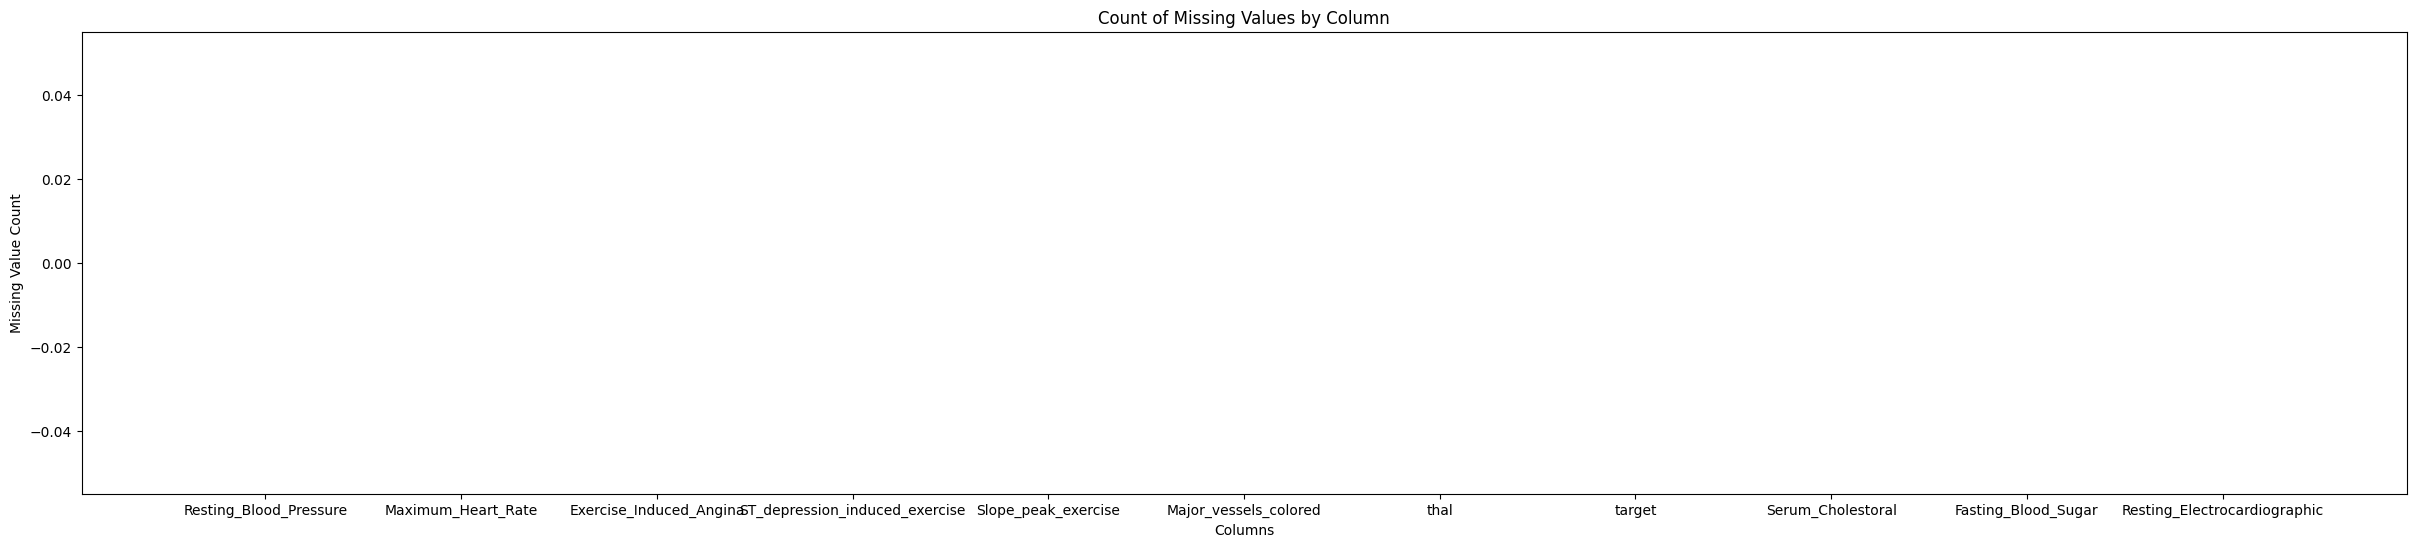

In [ ]:
columns = ['Resting_Blood_Pressure','Maximum_Heart_Rate','Exercise_Induced_Angina','ST_depression_induced_exercise','Slope_peak_exercise','Major_vessels_colored','thal','target','Serum_Cholestoral','Fasting_Blood_Sugar','Resting_Electrocardiographic']
missing_counts = Heart_data_df[columns].isnull().sum()
colors = np.array(['red', 'green', 'blue', 'orange', 'purple'])

# Creating bar plot
fig, ax = plt.subplots(figsize=(30,6))
ax.bar(columns, missing_counts, color=colors)

# Set chart title and axis labels
ax.set_title('Count of Missing Values by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Missing Value Count')

# Display the plot
plt.show()


Based on the provided information, it seems that the dataset being referred to contains two columns with a significant amount of missing values: Insulin and SkinThickness. Insulin appears to have close to 50%  of its values as zero or null  from the total data, while SkinThickness has close to 30% missing values.

In this section, our focus will be on conducting a preliminary Exploratory Data Analysis to gain a better understanding of the data. We will examine the distributions, correlations, and other relevant characteristics of the various columns, while also taking steps to address any missing values.

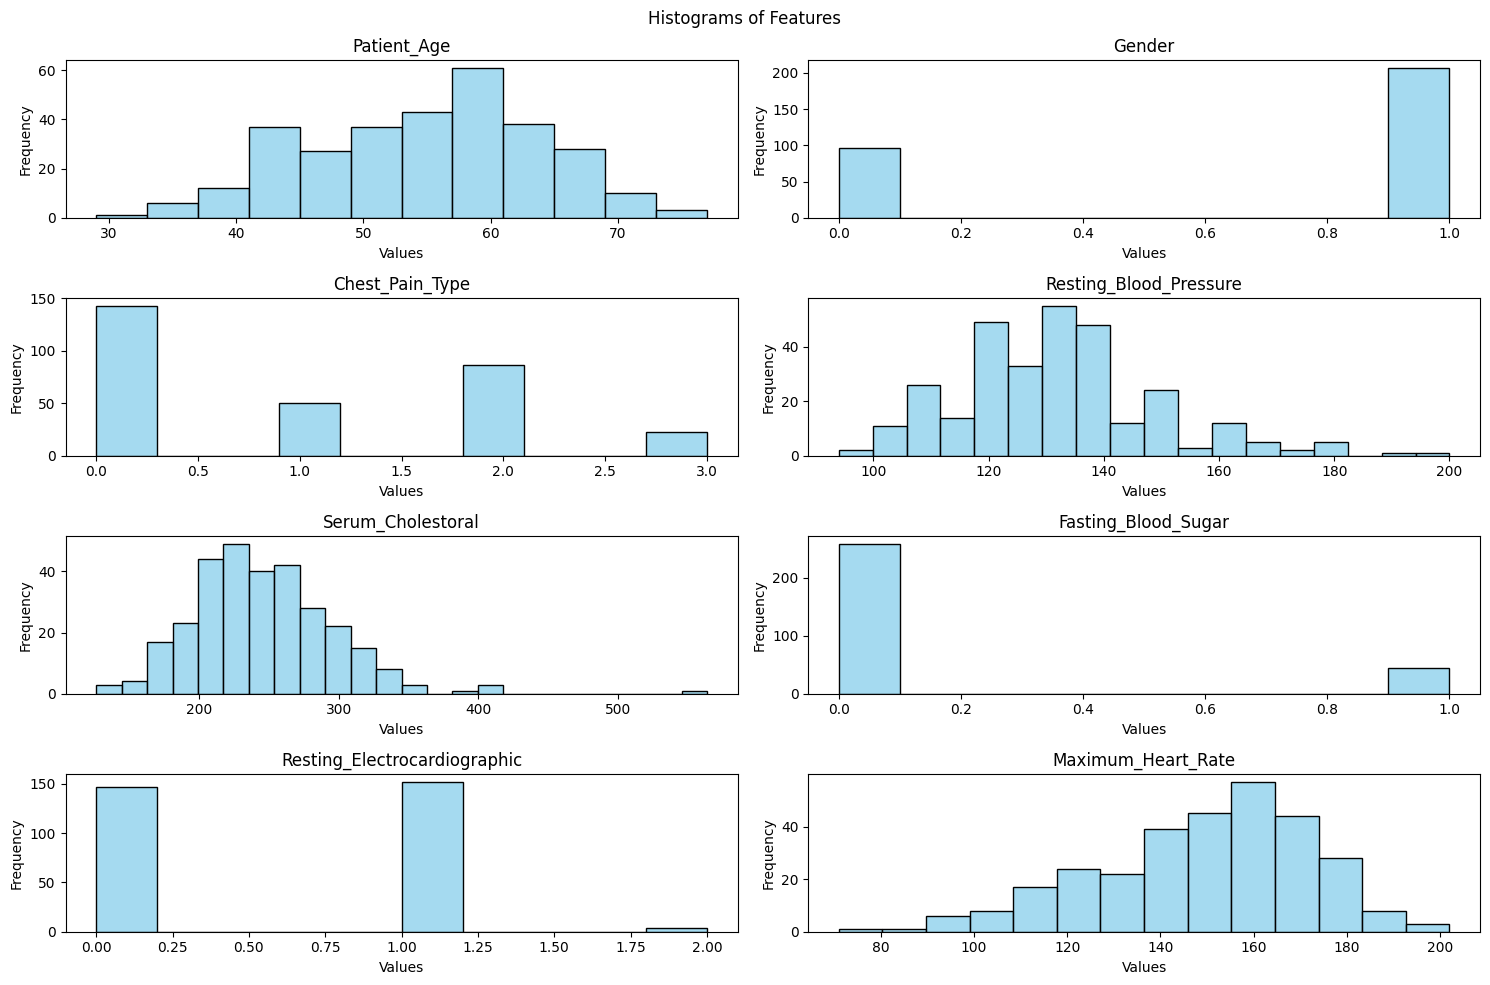

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = Heart_data_df.drop('target', axis=1).columns
for col in columns:
    sns.histplot(data=Heart_data_df, x=col, ax=axes[ax_idx], color='skyblue')
    axes[ax_idx].set_title(col)
    axes[ax_idx].set_xlabel('Values')
    axes[ax_idx].set_ylabel('Frequency')
    ax_idx += 1
    if ax_idx == 8: # added condition to prevent IndexError
        break

plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()


We should examine the skewness of every column.

Skewness relates to the degree of lack of symmetry in a particular characteristic or, put differently, the level of deviation from a normal distribution. The highest point on the histogram indicates the mode.

In [ ]:
from scipy.stats import skew
for col in Heart_data_df.drop('target', axis=1):
    skewness = skew(Heart_data_df[col])
    print("Skewness for the column '{}' is {:.3f}".format(col, skewness))


Skewness for the column 'Patient_Age' is -0.201
Skewness for the column 'Gender' is -0.787
Skewness for the column 'Chest_Pain_Type' is 0.482
Skewness for the column 'Resting_Blood_Pressure' is 0.710
Skewness for the column 'Serum_Cholestoral' is 1.138
Skewness for the column 'Fasting_Blood_Sugar' is 1.977
Skewness for the column 'Resting_Electrocardiographic' is 0.162
Skewness for the column 'Maximum_Heart_Rate' is -0.535
Skewness for the column 'Exercise_Induced_Angina' is 0.739
Skewness for the column 'ST_depression_induced_exercise' is 1.263
Skewness for the column 'Slope_peak_exercise' is -0.506
Skewness for the column 'Major_vessels_colored' is 1.304
Skewness for the column 'thal' is -0.474


Based on the observations provided, we can see that the "Pregnancies," "DiabetesPedigreeFunction," and "Age" columns have positive skewness, while the "Glucose," "BloodPressure," "SkinThickness," "Insulin," and "BMI" columns have missing values for skewness. This suggests that the data in those columns may not be normally distributed or there may be missing values. It is recommended to use the mean.


In [ ]:
Heart_data_df['Fasting_Blood_Sugar'] =Heart_data_df['Fasting_Blood_Sugar'].fillna(Heart_data_df['Fasting_Blood_Sugar'].median()) # Filling null values with the median.

for col in ['Resting_Blood_Pressure','Maximum_Heart_Rate','Exercise_Induced_Angina','ST_depression_induced_exercise','Slope_peak_exercise','Major_vessels_colored','thal','target','Serum_Cholestoral','Fasting_Blood_Sugar','Resting_Electrocardiographic']:
    Heart_data_df[col] = Heart_data_df[col].fillna(Heart_data_df[col].mean())

In [ ]:
Heart_data_df.isnull().sum()

Patient_Age                       0
Gender                            0
Chest_Pain_Type                   0
Resting_Blood_Pressure            0
Serum_Cholestoral                 0
Fasting_Blood_Sugar               0
Resting_Electrocardiographic      0
Maximum_Heart_Rate                0
Exercise_Induced_Angina           0
ST_depression_induced_exercise    0
Slope_peak_exercise               0
Major_vessels_colored             0
thal                              0
target                            0
dtype: int64

Missing values and null values are all handled now.

In [ ]:
# This is a function that calculates the average values for a specific column called 'var', based on whether an individual has diabetes or not.
def mean_trgt(var):
    return pd.DataFrame(Heart_data_df.groupby('Fasting_Blood_Sugar').mean()[var])

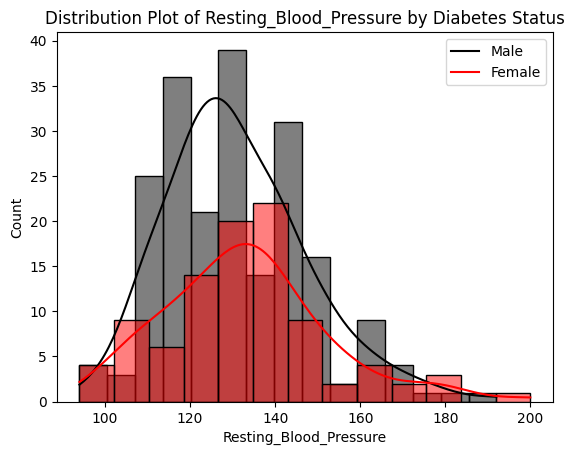

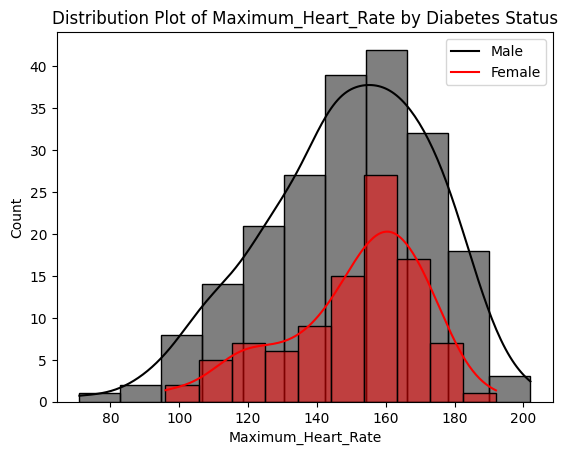

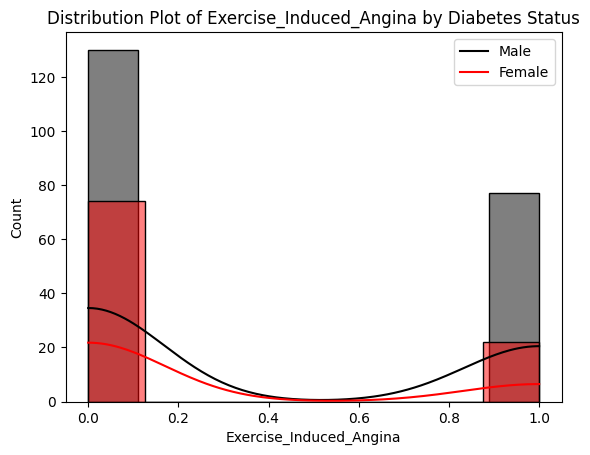

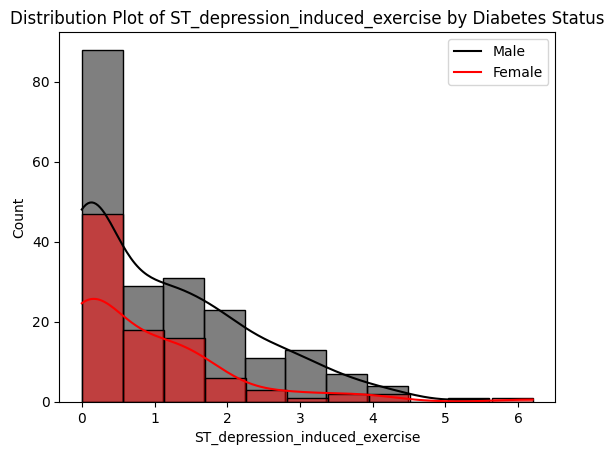

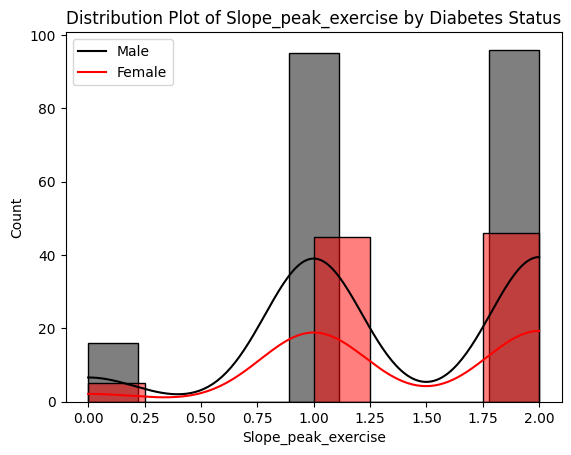

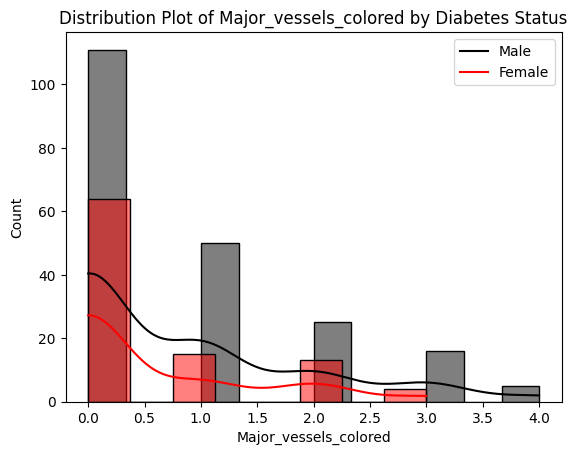

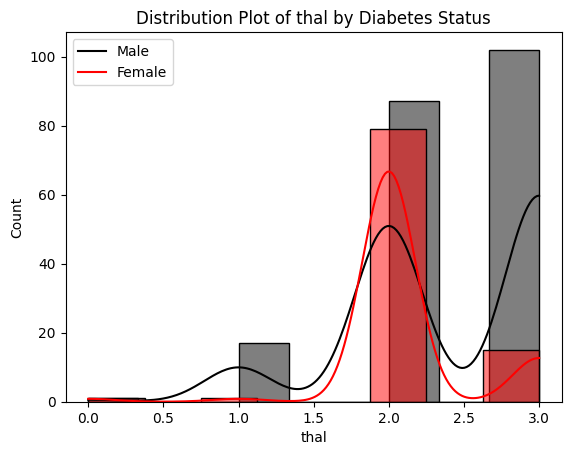

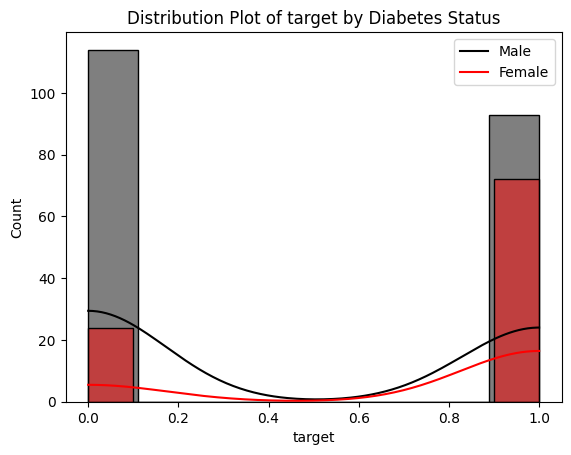

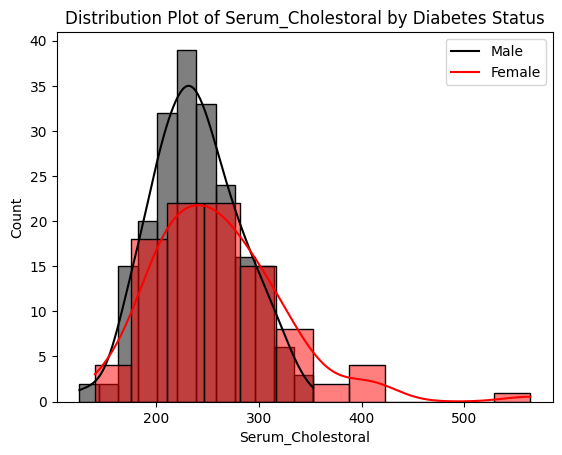

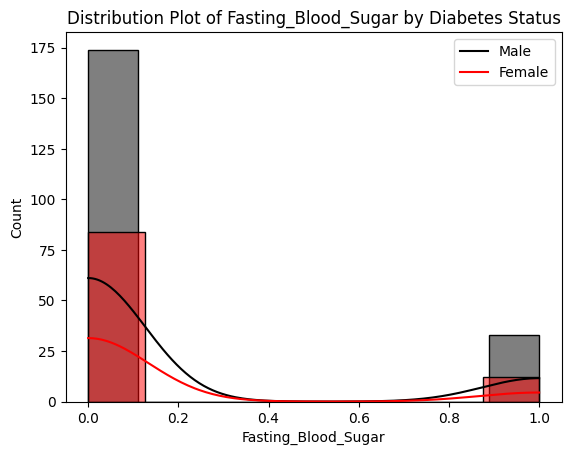

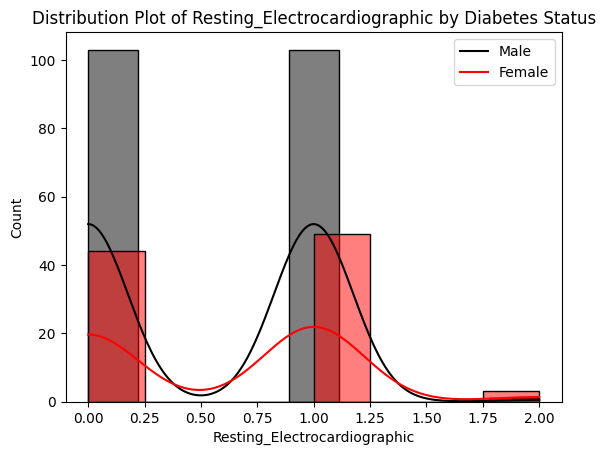

In [ ]:
import seaborn as sns

columns = ['Resting_Blood_Pressure','Maximum_Heart_Rate','Exercise_Induced_Angina','ST_depression_induced_exercise','Slope_peak_exercise','Major_vessels_colored','thal','target','Serum_Cholestoral','Fasting_Blood_Sugar','Resting_Electrocardiographic']

for col in columns:
    plt.figure()
    ax = sns.histplot(Heart_data_df[col][Heart_data_df.Gender == 1], color ="black", kde=True)
    sns.histplot(Heart_data_df[col][Heart_data_df.Gender == 0], color ="red", kde=True)
    plt.legend(['Male', 'Female'])
    ax.set(xlabel=col, ylabel='Count', title='Distribution Plot of '+col+' by Diabetes Status')


In [ ]:
# Calculate the mean targets for all columns
mean_targets = Heart_data_df.groupby('Gender').mean().T
mean_targets.columns = ['Male', 'Female']

# Print the mean targets in a tabular form
print(mean_targets)


                                      Male      Female
Patient_Age                      55.677083   53.758454
Chest_Pain_Type                   1.041667    0.932367
Resting_Blood_Pressure          133.083333  130.946860
Serum_Cholestoral               261.302083  239.289855
Fasting_Blood_Sugar               0.125000    0.159420
Resting_Electrocardiographic      0.572917    0.507246
Maximum_Heart_Rate              151.125000  148.961353
Exercise_Induced_Angina           0.229167    0.371981
ST_depression_induced_exercise    0.876042    1.115459
Slope_peak_exercise               1.427083    1.386473
Major_vessels_colored             0.552083    0.811594
thal                              2.125000    2.400966
target                            0.750000    0.449275


* Male patients have a slightly higher average age (55.7) compared to female patients (53.8).

* Chest pain type 1 is the most common type of chest pain in both male and female patients.

* Resting blood pressure is slightly higher in male patients (133.1) compared to female patients (130.9).

* Serum cholestoral levels are higher in male patients (261.3) compared to female patients (239.3).

* Fasting blood sugar levels are low in both male and female patients, but slightly more prevalent in female patients (15.9%) compared to male patients (12.5%).

* Resting electrocardiographic results are similar for both male and female patients, with a slightly higher prevalence of abnormal results (value 1) in male patients (57.2%) compared to female patients (50.7%).

* Maximum heart rate achieved during exercise is slightly higher in male patients (151.1) compared to female patients (148.9).

* Exercise-induced angina is more prevalent in female patients (37.2%) compared to male patients (22.9%).

* ST depression induced by exercise is higher in female patients (1.12) compared to male patients (0.88).

* The slope of the peak exercise ST segment is similar for both male and female patients.

* Major vessels colored by flourosopy are more prevalent in female patients (0.81) compared to male patients (0.55).

* The thalassemia types are slightly different for male and female patients, with a higher prevalence of type 2 in female patients (2.4) compared to male patients (2.1).

* The target variable (presence of heart disease) is more prevalent in male patients (75%) compared to female patients (44.9%).

**Analysis from box plots :**

In [ ]:
Heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient_Age                     303 non-null    int64  
 1   Gender                          303 non-null    int64  
 2   Chest_Pain_Type                 303 non-null    int64  
 3   Resting_Blood_Pressure          303 non-null    int64  
 4   Serum_Cholestoral               303 non-null    int64  
 5   Fasting_Blood_Sugar             303 non-null    int64  
 6   Resting_Electrocardiographic    303 non-null    int64  
 7   Maximum_Heart_Rate              303 non-null    int64  
 8   Exercise_Induced_Angina         303 non-null    int64  
 9   ST_depression_induced_exercise  303 non-null    float64
 10  Slope_peak_exercise             303 non-null    int64  
 11  Major_vessels_colored           303 non-null    int64  
 12  thal                            303 

Let's think like a common man, and analyze the data.



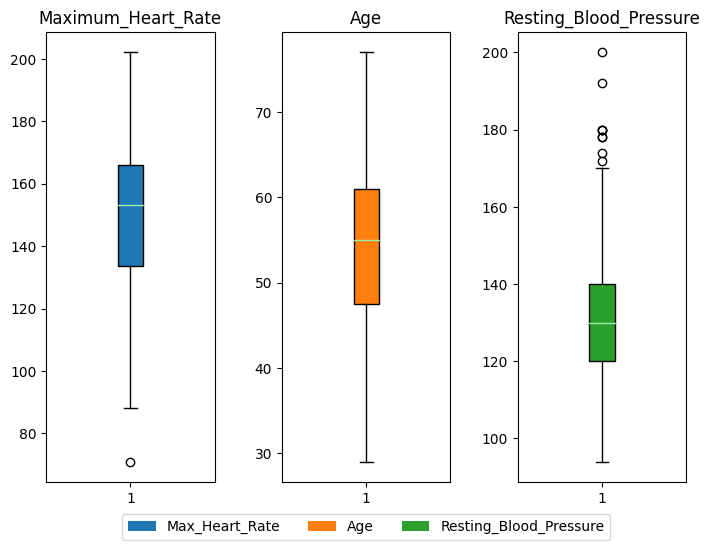

In [ ]:
# Load the dataset into a pandas DataFrame
Heart_data_df = pd.read_csv("H.csv")
# Define colors for the box plots
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a figure with three subplots, one for each column
fig, axs = plt.subplots(ncols=3, figsize=(8,6))

# Create a box plot for the "Resting_Blood_Pressure" column
axs[0].boxplot(Heart_data_df["Maximum_Heart_Rate"], patch_artist=True, boxprops=dict(facecolor=colors[0]))
axs[0].set_title("Maximum_Heart_Rate")

# Create a box plot for the "Age" column
axs[1].boxplot(Heart_data_df["Patient_Age"], patch_artist=True, boxprops=dict(facecolor=colors[1]))
axs[1].set_title("Age")

# Create a box plot for the "Bloodpressure" column
axs[2].boxplot(Heart_data_df["Resting_Blood_Pressure"], patch_artist=True, boxprops=dict(facecolor=colors[2]))
axs[2].set_title("Resting_Blood_Pressure")

# Adjust the spacing of the subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.4)

# Create a separate subplot for the legend
legend_ax = fig.add_axes([0.1, 0.05, 0.8, 0.05])
legend_ax.axis("off")
legend_labels = ["Max_Heart_Rate", "Age", "Resting_Blood_Pressure"]
patch_list = [plt.Rectangle((0,0),1,1,facecolor=colors[i]) for i in range(len(legend_labels))]
legend_ax.legend(patch_list, legend_labels, loc="center", ncol=3)

# Show the plot
plt.show()


The box plots show the distribution of the "Maximum_Heart_Rate", "Age", and "Resting_Blood_Pressure" columns in the Heart_data_df dataset. The maximum heart rate appears to have a wide range of values, with several outliers above the upper quartile. The age distribution is skewed towards the middle-aged population, with the majority of patients falling between the ages of 45 and 65. The resting blood pressure distribution has a normal shape, with a mean value around 130 mmHg and a few outliers above the upper quartile. Overall, the box plots provide a quick and informative summary of the distribution of each variable in the dataset.

**Correlation Matrix:**

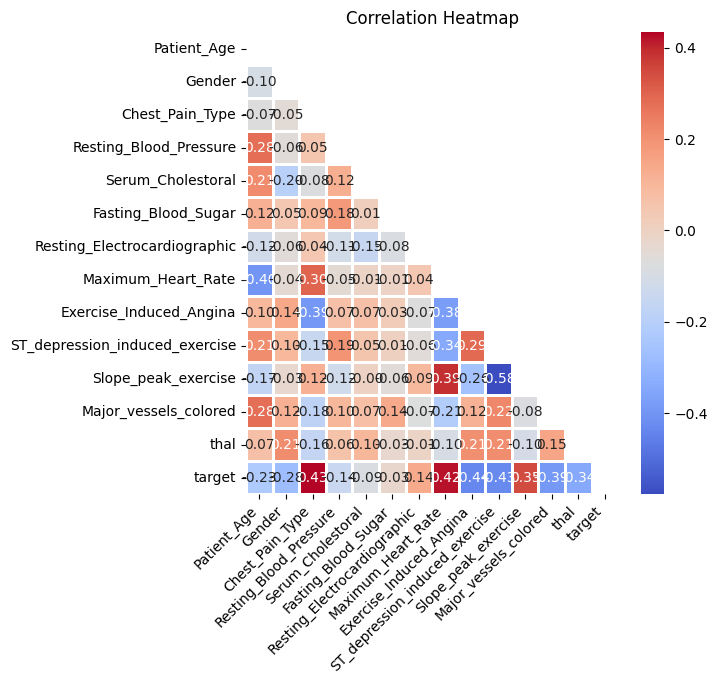

In [ ]:
plt.figure(figsize=(6, 6), dpi=100)

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(Heart_data_df.corr(), dtype=bool))

# Create the heatmap using seaborn
sns.heatmap(Heart_data_df.corr(), mask=mask, fmt=".2f", annot=True, linewidths=1, cmap='coolwarm')

# Rotate the x-axis and y-axis tick labels for better visibility
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()


The diagonal of the heatmap shows the correlation of each variable with itself, which is always 1.
The highest positive correlation is observed between 'Target' and 'Chest Pain Type' features.
The highest negative correlation is observed between 'Target' and 'ST Depression induced exercise' features.
'Maximum Heart Rate' feature shows a strong negative correlation with 'Age' feature, which means that as the age increases, the maximum heart rate decreases.
There is a moderate positive correlation between 'Maximum Heart Rate' and 'Exercise induced Angina' features.
There is a moderate negative correlation between 'ST Depression induced exercise' and 'Slope peak exercise' features.

**Pair Plots:** The pairplot provides a useful visualization of the relationships between the features and the target variable, which can help guide feature selection and modeling decisions.

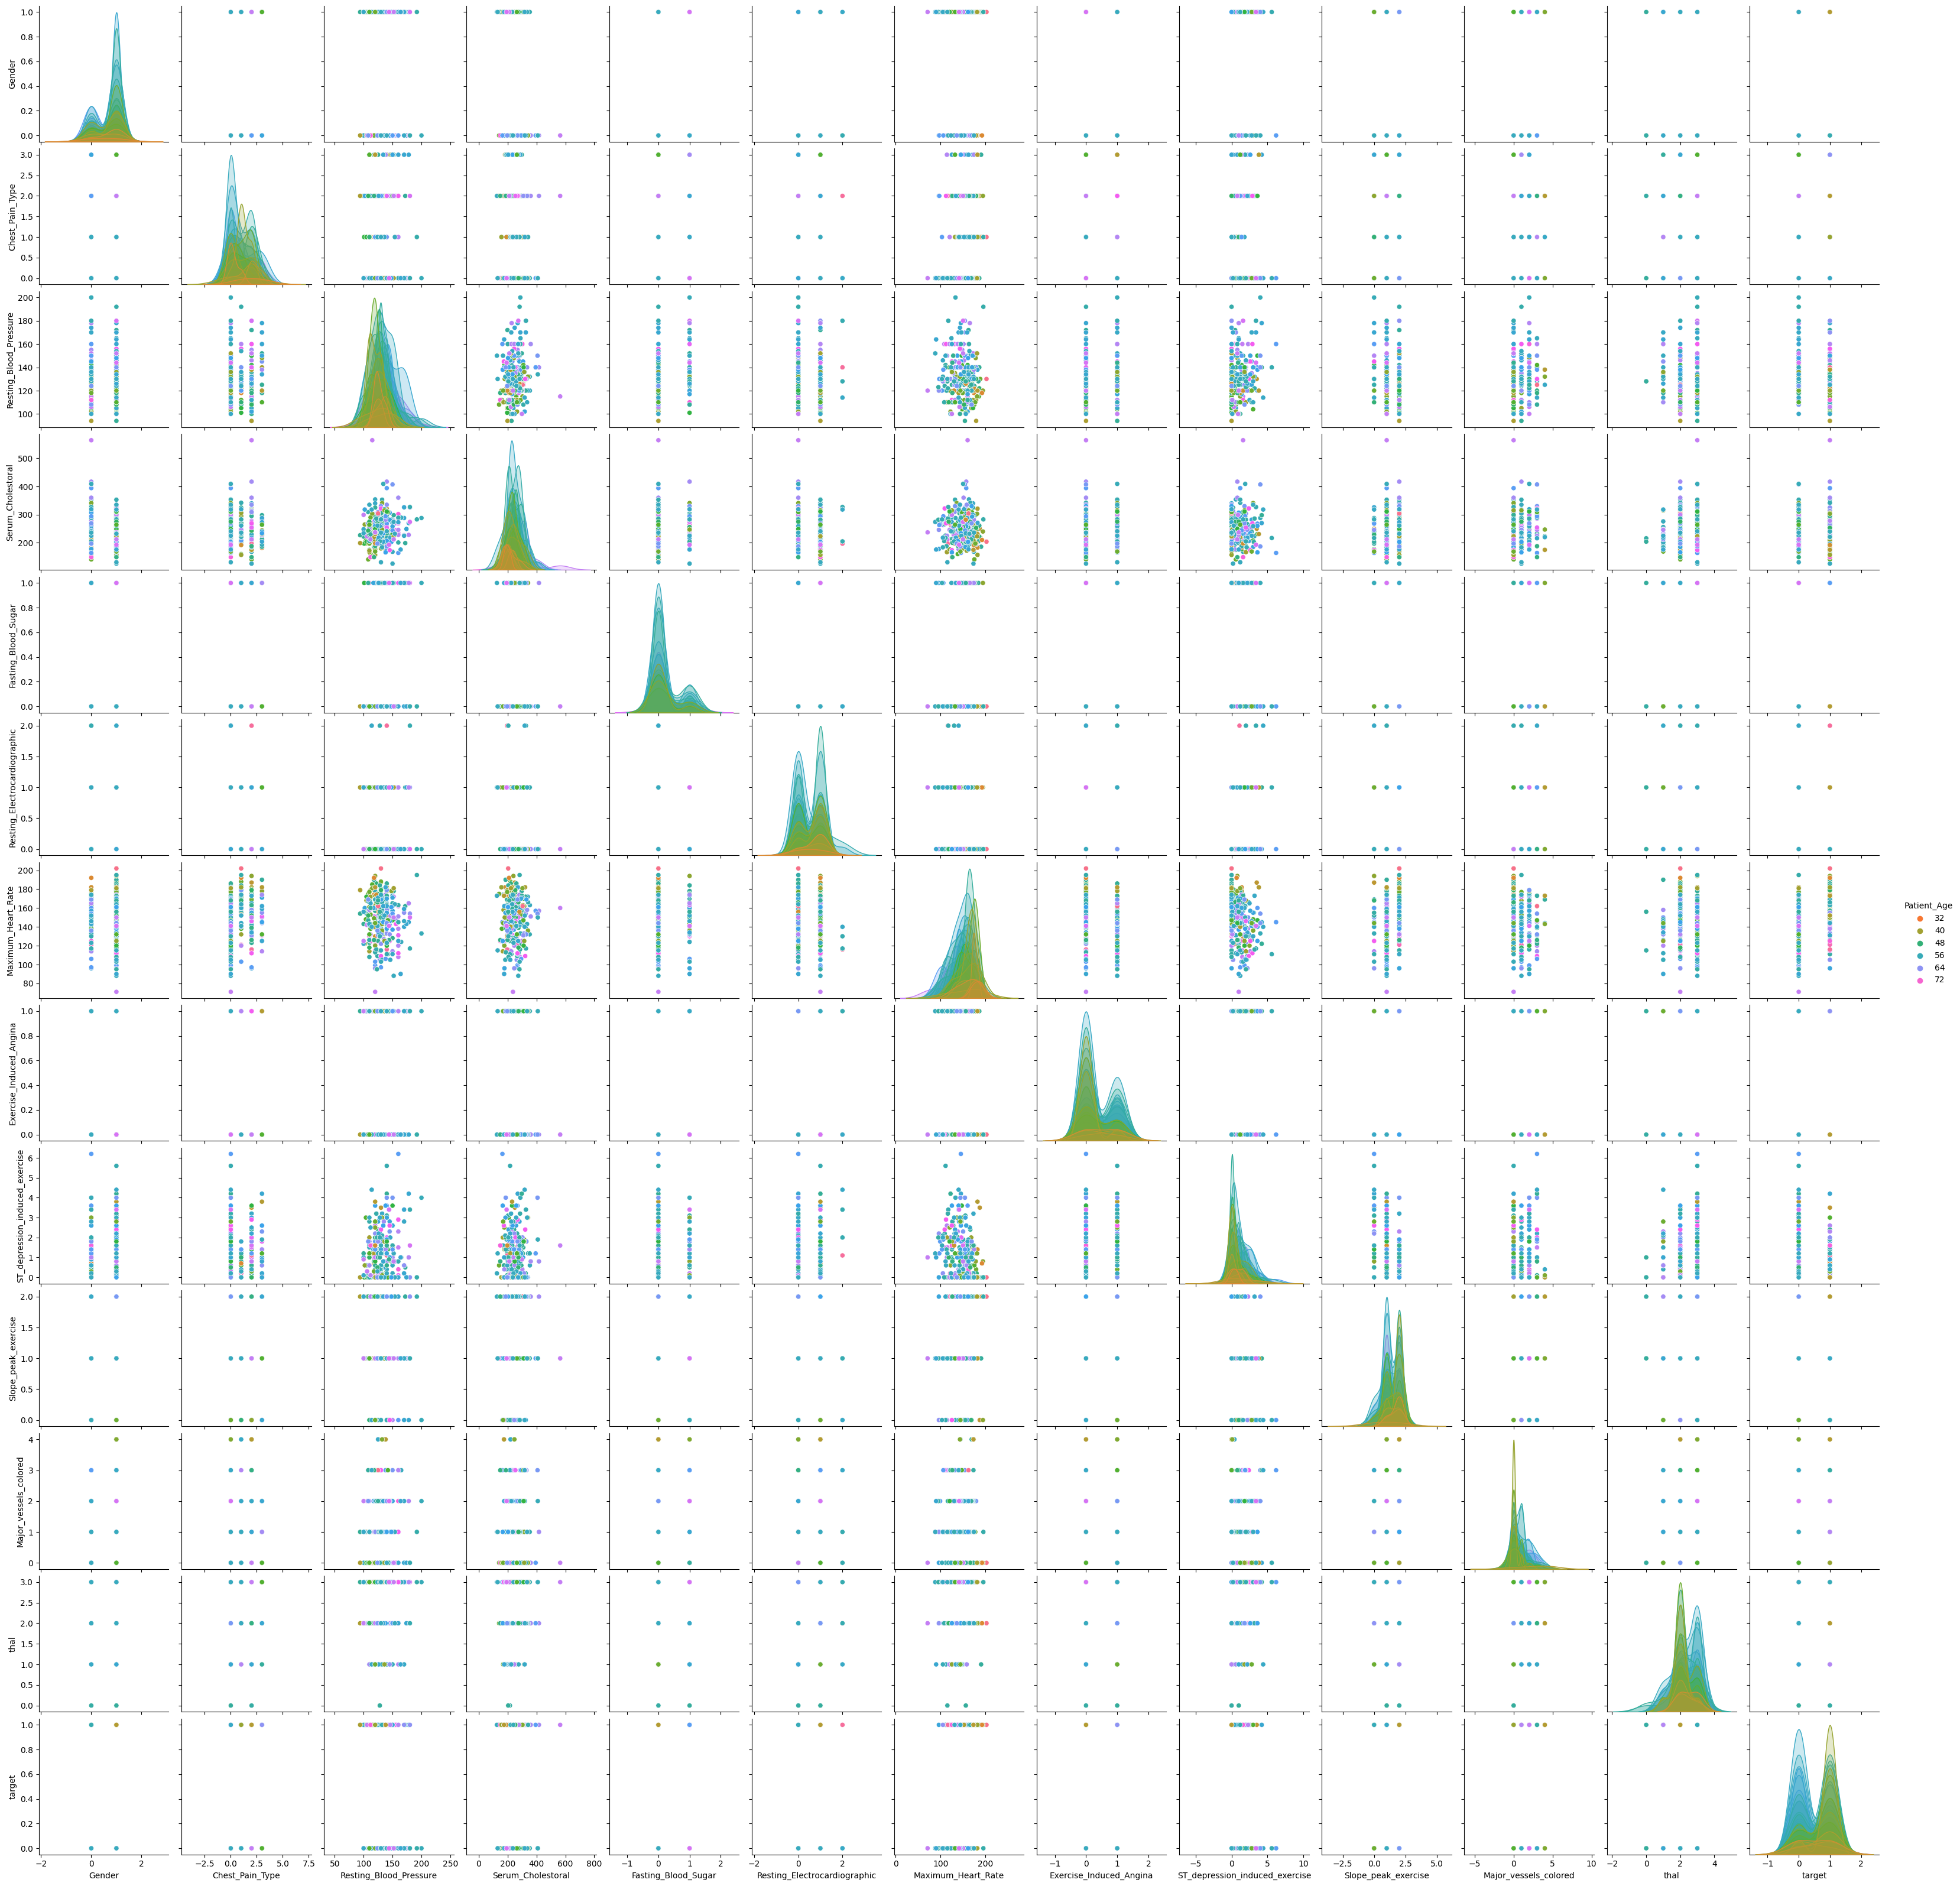

In [ ]:
sns.pairplot(Heart_data_df, hue="Patient_Age",palette="husl")

**Model Building :**

In [ ]:
x = Heart_data_df.loc[:, Heart_data_df.columns != 'target']
y = Heart_data_df['target']

In [ ]:

print(x)

     Patient_Age  Gender  Chest_Pain_Type  Resting_Blood_Pressure  \
0             63       1                3                     145   
1             37       1                2                     130   
2             41       0                1                     130   
3             56       1                1                     120   
4             57       0                0                     120   
..           ...     ...              ...                     ...   
298           57       0                0                     140   
299           45       1                3                     110   
300           68       1                0                     144   
301           57       1                0                     130   
302           57       0                1                     130   

     Serum_Cholestoral  Fasting_Blood_Sugar  Resting_Electrocardiographic  \
0                  233                    1                             0   
1                

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


**Train Test Split**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Standardization of a dataset involves adjusting the distribution of values in such a way that the mean of observed values becomes 0 and the standard deviation becomes 1. This process can be achieved by either centering the data or subtracting the mean value. Scaling the features is crucial because different features have varying scales. For instance, the Age feature may have values in double digits, whereas DPF may have values in float format, and the effect of the Age feature on the model may be greater than that of the DPF feature.

It is recommended to only use the training set for determining how to scale/normalize the data and then apply the same transform to the test set without making any modifications. If you use the whole dataset to calculate the feature mean and variance, you're using information about the distribution of the test set to set the scale of the training set, which may lead to information leakage.

Therefore, the correct approach is to calculate the mean and variance using only the training set, normalize the training set accordingly, and then use the same (training) mean and variance to normalize the test set during test time.

In [ ]:
print("Number of transactions x_train dataset: ", x_train.shape)
print("Number of transactions y_train dataset: ", y_train.shape)
print("Number pf transactions x_test dataset: ", x_test.shape)
print("Number of transactions y_test dataset: ", y_test.shape)

Number of transactions x_train dataset:  (227, 13)
Number of transactions y_train dataset:  (227,)
Number pf transactions x_test dataset:  (76, 13)
Number of transactions y_test dataset:  (76,)


**Feature Scaling :**

Feature scaling is a method used during data preprocessing to standardize the independent features in a fixed range. This is necessary to handle highly varying magnitudes or values or units. If feature scaling is not performed, a machine learning algorithm will tend to weigh greater values higher and consider smaller values as lower values, regardless of the unit of the values. The Standard Scaler is an effective technique that rescales a feature value so that it has a distribution with a mean of 0 and a variance of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

**SVM algorithm :**

Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates different classes in a dataset. SVM can handle both linear and non-linear data by using kernel functions. SVM aims to maximize the margin between the support vectors and the decision boundary, making it more robust to outliers.

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)


In [ ]:
y_pred=svm_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.7631578947368421

**Classification report :**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        35
           1       0.73      0.88      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.75      0.75        76
weighted avg       0.77      0.76      0.76        76



In [ ]:
train_score_svm = round(accuracy_score(y_train, svm_classifier.predict(x_train)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm_classifier.predict(x_test)) * 100, 2)

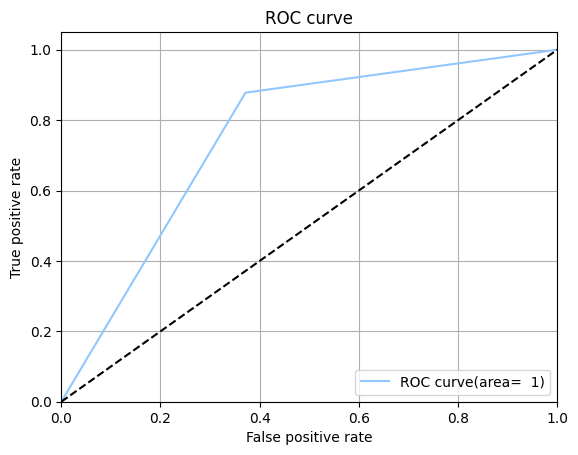

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##XG  Boost Algorithm

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        35
           1       0.72      0.80      0.76        41

    accuracy                           0.72        76
   macro avg       0.73      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



In [ ]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(x_train)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(x_test)) * 100, 2)

**Random forest classifier :**

A random forest model is a type of classifier that builds multiple decision trees by randomly selecting subsets of the training set. The model combines the results of the individual trees to determine the final class of a test object. This approach is effective because a single decision tree may be susceptible to noise, but the aggregation of many decision trees reduces the impact of noise, resulting in more precise outcomes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Y_pred = rand.predict(x_test)
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7763157894736842


In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.75      0.88      0.81        41

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



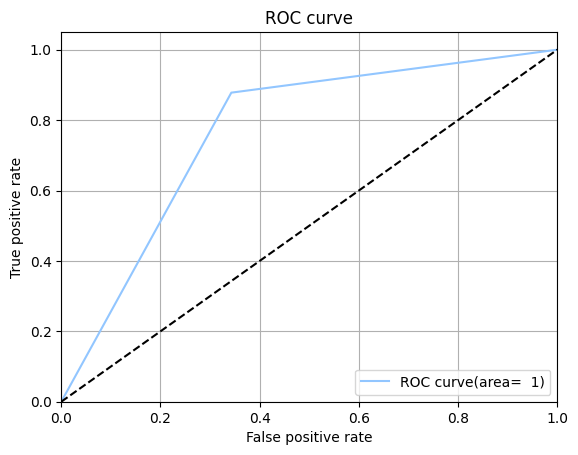

In [ ]:
fpr,tpr,_=roc_curve(y_test,Y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
train_score_rand = round(accuracy_score(y_train, rand.predict(x_train)) * 100, 2)
test_score_rand = round(accuracy_score(y_test, rand.predict(x_test)) * 100, 2)

In [ ]:
score = (linear_model.LogisticRegression(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

SyntaxError: ignored

In [ ]:
models = {
           'Train Accuracy': [train_score_svm, train_score_xgb, train_score_rand, train_score_xgb],
          'Test Accuracy' : [test_score_svm, test_score_xgb, test_score_rand?, test_score_xgb]
         }

models = pd.DataFrame(models, index = ['Support Vector Machine','Random Forest Classifier', 'K-Nearest Neighbor', 'XGBoost'])
models.head()

Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'D_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
with open('D_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
input_data = np.array([5,166,72,19,175,25.8,0.587,51])
input_data_reshaped = input_data.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
result = 'The individuals health condition is characterized by diabetes.' if prediction[0] == 1 else 'The individuals health condition is not characterized by diabetes.'
print(result)


In [ ]:
for column in x.columns:
  print(column)